In [1]:
pip install threadpoolctl==3.1.0   #required to resolve the conflict with SMOTE library

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sklearn
import xgboost
from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RepeatedKFold

import joblib
from sklearn.linear_model import LassoCV
#models

#model evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

#backup
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier


import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from matplotlib.ticker import PercentFormatter

In [3]:
parent_dir = "/Users/u0126415/Desktop/找工作/[+]牛津-Postdoctoral Health Data Scientist/面试答案/multiclass_classification"

output_dir = f"{parent_dir}/output"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
output_feature_selection = f"{output_dir}/feature_selection"

if not os.path.exists(output_feature_selection):
    os.makedirs(output_feature_selection)
    
output_models = f"{output_dir}/models"

if not os.path.exists(output_models):
    os.makedirs(output_models)
    
output_computation = f"{output_dir}/computation"

if not os.path.exists(output_computation):
    os.makedirs(output_computation)    
    
output_log = f"{output_dir}/log"

if not os.path.exists(output_log):
    os.makedirs(output_log)    


# Data loading

In [4]:
df = pd.read_csv(f"{parent_dir}/fetal_health.csv")
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


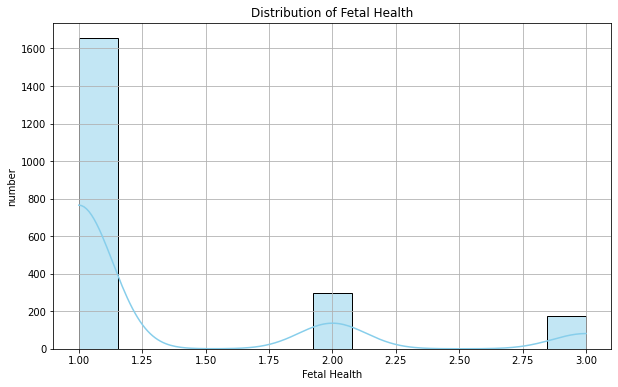

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fetal_health'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('number')
plt.grid(True)
plt.show()

In [6]:
cond_SMOTE = True  #Great class imblance in Y label, we adopt SMOTE to resolve it
y_name = "fetal_health"
X_names = [x for x in df.columns.to_list() if x !=y_name]

# 1.0 Data preprocessing

# 1.1 Checking missing data

In [7]:
# Combine the missing values and percentage into a single DataFrame for better visualization
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_data_summary = pd.DataFrame({
    'Total Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the summary
print("\nMissing Data Summary DataFrame:")
print(missing_data_summary)


Missing Data Summary DataFrame:
                                                    Total Missing Values  \
baseline value                                                         0   
accelerations                                                          0   
fetal_movement                                                         0   
uterine_contractions                                                   0   
light_decelerations                                                    0   
severe_decelerations                                                   0   
prolongued_decelerations                                               0   
abnormal_short_term_variability                                        0   
mean_value_of_short_term_variability                                   0   
percentage_of_time_with_abnormal_long_term_vari...                     0   
mean_value_of_long_term_variability                                    0   
histogram_width                                        

## 1.2 SMOTE

In [8]:
X, y = df[X_names], df[y_name]

y = LabelEncoder().fit_transform(y)
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print(np.unique(y,return_counts=True))

#reassembly back to dataframe
y = pd.DataFrame(y,columns = [y_name],index = X.index)
df = pd.concat([X,y],axis = 1)

(array([0, 1, 2]), array([1655, 1655, 1655]))


In [9]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,73.000000,0.500000,43.000000,...,62.000000,126.000000,2.000000,0.000000,120.000000,137.000000,121.000000,73.000000,1.000000,1
1,132.000000,0.006000,0.000000,0.006000,0.003000,0.000,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,0
2,133.000000,0.003000,0.000000,0.008000,0.003000,0.000,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,0
3,134.000000,0.003000,0.000000,0.008000,0.003000,0.000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,0
4,132.000000,0.007000,0.000000,0.008000,0.000000,0.000,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,129.000000,0.000000,0.001000,0.006000,0.006000,0.000,0.002256,66.000000,3.123229,0.000000,...,50.000000,145.488191,8.000000,0.000000,105.000000,82.767713,108.255904,10.255904,0.000000,2
4961,145.813670,0.000000,0.001259,0.000741,0.000000,0.000,0.000000,82.481809,0.325910,30.481809,...,131.481809,167.409043,2.000000,0.000000,146.072765,145.813670,147.072765,0.259096,-0.481809,2
4962,130.245978,0.001918,0.000000,0.011672,0.012262,0.000,0.000246,61.081993,2.016399,0.000000,...,50.163985,177.655942,5.000000,0.000000,121.327971,98.163985,114.426051,95.639855,0.000000,2
4963,121.000000,0.000000,0.001000,0.003100,0.010900,0.001,0.000000,66.900365,2.100000,0.000000,...,55.000000,157.298904,4.298904,0.900365,67.000000,81.398539,87.498174,90.992696,-1.000000,2


## 1.3 Random split

In [10]:
def random_split(df, target_column, test_size=0.2, random_state=None, stratify=False):
    """
    Splits the dataframe into training and testing sets.

    Parameters:
    - df: pandas DataFrame
    - target_column: str, name of the target column
    - test_size: float, optional (default=0.2), proportion of the dataset to include in the test split
    - random_state: int, optional, controls the shuffling applied to the data before applying the split
    - stratify: bool, optional, whether to perform stratified sampling based on the target column

    Returns:
    - X_train: Training set features
    - X_test: Test set features
    - y_train: Training set labels
    - y_test: Test set labels
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    if stratify:
        stratify_param = y
    else:
        stratify_param = None

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=stratify_param
    )

    return X_train, X_test, y_train, y_test


In [11]:
X_train, X_test, y_train, y_test = random_split(df, y_name, test_size=0.2, random_state=None, stratify=False)

## 1.4 Normalization

In [12]:
cols = X_train.columns
index_train = X_train.index
index_test = X_test.index
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols,index = index_train)
X_test = pd.DataFrame(X_test,columns=cols,index = index_test)

joblib.dump(scaler, f"{output_dir}/sclare.bin")

['/Users/u0126415/Desktop/找工作/[+]牛津-Postdoctoral Health Data Scientist/面试答案/multiclass_classification/output/sclare.bin']

# 2 Feature selection

# 2.1 Unsupervised feature selection

In [13]:
#The feature selection includes unsupervised and supervised LASSO-based feature selections.
def unsupervised_FS(X_train, X_test,correlation_threshold = 0.85):
    """
	The function is to perfrom unsupervised feature selection by excluding one of the highly correlated features.
	:param X_train: training data
	:param X_test: test data
	:param correlation_threshold: threshold to define highly-correlated features
	return: processed training data, processed test data, list of retained features
	"""
	# create correlation  matrix
    corr_matrix = X_train.corr().abs()

	# select upper traingle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

	# Find index of columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
    non_related_features = [column for column in upper.columns if not column in to_drop]

	# drop the columns
    X_train = X_train.drop(X_train[to_drop], axis=1)
    X_test = X_test.drop(X_test[to_drop], axis=1)
    print(f"Drop {len(to_drop)} features")
    print(f"Keep {len(non_related_features)} features")

    return X_train,X_test,non_related_features

In [14]:
X_train,X_test,non_related_features = unsupervised_FS(X_train, X_test,correlation_threshold = 0.85)

Drop 3 features
Keep 18 features


## 2.2 Supervised feature selection by LASSO

In [15]:
def LASSO(df_input, y_name,random_state, test_size=0.2):
	"""
	The function is to set up a pipeline for supervised LASSO-based feature selection.
	:param df_input: data for LASSO
	:param y_name: column name for Y label
	:param test_size: percentage for test data in LASSO regression
	:param random_state: random state for data splitting
	return: feature names and corresponding coefficient
	"""

	y = df_input[y_name]

	list_to_drop = [y_name]
	X = df_input.drop(list_to_drop, axis=1)
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

	model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)

	model.fit(X_train, y_train)
	coef = model.coef_

	imp_features = pd.Series(X_train.columns)[list(coef != 0)]

	X_train_LASSO = X_train[imp_features]
	X_test_LASSO = X_test[imp_features]
	return imp_features, coef[list(coef != 0)]

def bootstrap_LASSO(df_train,non_related_features,output_dir, y_name = "Origin_num",cycle_number = 100):
	"""
	The function is to perfrom supervised LASSO-based feature selection by bootsraping training data.
	:param df_train: training data for LASSO-based feature selection
	:param non_related_features: column name unrelated features from unsupervised feature selection
	:param output_dir: path to save output
	:param y_name: column name for Y label
	"""
	# repeat for 100 times for demonstration purpose. Normally, I adopted 1000 for actual calculation
	df_features_lasso = df_train[non_related_features + [y_name]]

	for i in range(cycle_number):
		output_name = f'Lasso_seed_{i}.xlsx'
		if not os.path.exists(os.path.join(output_dir, output_name)):
			output = {}
			output['feature'] = []
			output['coef'] = []

			imp_features, _coef = LASSO(df_features_lasso, y_name,i,test_size=0.2)
			output['feature'] = imp_features
			output['coef'] = _coef
			df_i = pd.DataFrame.from_dict(output)
			df_i.to_excel(os.path.join(output_dir, output_name), index=False)

def summarize_lasso_result(lasso_output_dir):
	"""
	The function is to summarize results from LASSO-based feature selection.
	The mean, standard deviation and percentage of missing cycle are calculated.
	:param lasso_output_dir: folder path for saving individual LASSO-based feature selection
	return concatenated and processed dataframe for LASSO-based feature selection
	"""
	lasso_list = [x for x in os.listdir(lasso_output_dir) if x.startswith("Lasso_seed_")]
	df_list = []
	for i in lasso_list:
		i_file = pd.read_excel(f'{lasso_output_dir}/{i}')
		length = i_file.shape[0]
		i_file['cycle'] = [i[:-5] for x in range(int(length))]
		df_list.append(i_file)
	df_final = pd.concat(df_list)
	df_wide = pd.pivot(df_final, index=['feature'], columns='cycle', values='coef')

	df_wide['mean'] = df_wide.mean(axis=1)
	df_wide['sd'] = df_wide.std(axis=1)
	df_wide.sort_values(by=['mean'])
	cycle_number = len(np.unique(df_final['cycle']))
	df_wide['Missing_cycle(%)'] = [x / (cycle_number) for x in df_wide.isnull().T.sum().T]
	cols = ['mean', 'Missing_cycle(%)', 'sd']
	df_wide = df_wide[cols + [c for c in df_wide.columns if c not in cols]]
	df_wide.reset_index(inplace=True)
	df_wide.to_excel(os.path.join(lasso_output_dir, f'compile_{len(df_list)}.xlsx'), index=False)

	return df_wide

def get_selected_feature_by_threshold(lasso_output_dir,threshold = 0.2):
	"""
	The function is to get selected features by LASSO by thresholding
	:param lasso_output_dir: folder path for saving compiled LASSO-based feature selection
	:param threshold: threshold for selecting features
	return: 1. dataframe for compiled LASSO-based feature selection
			2. names of selected features
	"""
	file_name = [x for x in os.listdir(lasso_output_dir) if x.startswith("compile")][0]
	file_path = f"{lasso_output_dir}/{file_name}"
	df = pd.read_excel(file_path)
	selected_features = df[df["Missing_cycle(%)"] < threshold]["feature"]
	return df, selected_features

In [16]:
def plot_feature_importance(df,output_dir,threshold = 0.2):
    """
    The function is to plot relative feature importance
    :param df: dataframe for compiled LASSO-based feature selection
    :param output_dir: folder path to save the plot
    :param threshold: threshold for selecting features to be plotted
    """
    # data preparation
    df_plot = df.loc[df["Missing_cycle(%)"] < threshold, ["mean", 'feature']]
    df_plot.reset_index(inplace=True)

    #If more than 10 features are eligible, we plot only the top 10 features
    df_plot = df_plot.sort_values(by=['mean'], ascending=False).iloc[:10, ]

    def split_string_middle(s):
        underscores = [i for i, char in enumerate(s) if char == '_']
        total_underscores = len(underscores)

        if total_underscores == 0:
            return s + '\n'
        elif total_underscores == 1:
            parts = s.split('_', 1)
            return parts[0] + '\n' + parts[1]
        else:
            middle_index = total_underscores // 2
            split_point = underscores[middle_index]
            return s[:split_point] + '\n' + s[split_point + 1:]
    
    feature_names = []
    for i in df_plot['feature']:
        feature_names.append(split_string_middle(i))
    
    
    
    importance = df_plot['mean']
    importance = np.abs(importance) / np.sum(np.abs(importance))
    indices = np.argsort(importance)

    #Plotting
    plt.figure(figsize=(10, np.ceil(len(df_plot) * 1.5)))  ##
    plt.title(f'Relative feature importance', fontsize=40, fontname="Arial", fontweight='semibold', pad=18)
    plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
    plt.barh(range(len(indices)), importance, color='#219ebc', align='center')
    # plt.barh(range(len(indices)), importance, color='#EAEAF2', align='center')
    x_max = np.ceil(max(importance) * 11) / 10
    plt.xlim(0, x_max)  ##
    for index, value in enumerate(importance):
        plt.text(value, index, " {:.1%}".format(value), fontsize=26)

    feature = feature_names
    feature_name_to_show = feature

    # plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.xticks(fontname="Arial", fontsize=20)
    plt.yticks(range(len(indices)), [i for i in feature_name_to_show], fontname="Arial", fontsize=20)
    plt.gca().invert_yaxis()
    plt.savefig(f"{output_dir}/relative_importance.jpg", dpi=300, bbox_inches='tight')
    plt.show()

In [17]:
y_train = pd.DataFrame(y_train,columns=[y_name])
df_train = pd.concat([X_train,y_train],axis = 1)

# Combine the missing values and percentage into a single DataFrame for better visualization
missing_values = df_train.isnull().sum()
missing_percentage = (df_train.isnull().sum() / len(df)) * 100
missing_data_summary = pd.DataFrame({
    'Total Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the summary
print("\nMissing Data Summary DataFrame:")
print(missing_data_summary)


Missing Data Summary DataFrame:
                                                    Total Missing Values  \
baseline value                                                         0   
accelerations                                                          0   
fetal_movement                                                         0   
uterine_contractions                                                   0   
light_decelerations                                                    0   
severe_decelerations                                                   0   
prolongued_decelerations                                               0   
abnormal_short_term_variability                                        0   
mean_value_of_short_term_variability                                   0   
percentage_of_time_with_abnormal_long_term_vari...                     0   
mean_value_of_long_term_variability                                    0   
histogram_width                                        

In [18]:
bootstrap_LASSO(df_train,non_related_features,output_feature_selection, y_name,100)
summarize_lasso_result(output_feature_selection)

cycle,feature,mean,Missing_cycle(%),sd,Lasso_seed_0,Lasso_seed_1,Lasso_seed_10,Lasso_seed_11,Lasso_seed_12,Lasso_seed_13,...,Lasso_seed_90,Lasso_seed_91,Lasso_seed_92,Lasso_seed_93,Lasso_seed_94,Lasso_seed_95,Lasso_seed_96,Lasso_seed_97,Lasso_seed_98,Lasso_seed_99
0,abnormal_short_term_variability,0.295299,0.0,0.005350,0.291960,0.289738,0.291021,0.293856,0.295018,0.295035,...,0.298567,0.298197,0.292022,0.287484,0.287348,0.297349,0.292074,0.293522,0.289490,0.291958
1,accelerations,-0.129682,0.0,0.004979,-0.132546,-0.129656,-0.120720,-0.138406,-0.131269,-0.133839,...,-0.138009,-0.131218,-0.122790,-0.126047,-0.139284,-0.130356,-0.139384,-0.133132,-0.129018,-0.127574
2,baseline value,0.030070,0.0,0.007377,0.031495,0.015980,0.042475,0.031962,0.031595,0.020267,...,0.029386,0.021056,0.041342,0.031369,0.024171,0.035697,0.026046,0.035502,0.035490,0.029861
3,fetal_movement,0.021335,0.0,0.004000,0.019122,0.014973,0.016696,0.019014,0.022961,0.017102,...,0.022875,0.020553,0.020684,0.021414,0.022304,0.025702,0.015575,0.026665,0.016810,0.018835
4,histogram_max,0.048077,0.0,0.009586,0.035805,0.059815,0.040758,0.043658,0.048593,0.045028,...,0.037987,0.065298,0.040382,0.049532,0.054373,0.035094,0.052035,0.059111,0.035895,0.045989
5,histogram_mode,-0.086238,0.0,0.011182,-0.078246,-0.072606,-0.114766,-0.077734,-0.088701,-0.060113,...,-0.079860,-0.082816,-0.097716,-0.095283,-0.091674,-0.078230,-0.087568,-0.110043,-0.084138,-0.094833
6,histogram_number_of_peaks,-0.053124,0.0,0.006132,-0.051079,-0.053450,-0.055265,-0.043151,-0.064467,-0.058891,...,-0.059304,-0.060752,-0.057758,-0.045274,-0.055354,-0.053967,-0.050582,-0.052527,-0.053686,-0.051763
7,histogram_number_of_zeroes,0.006378,0.0,0.004621,0.008915,-0.001999,0.005034,0.006117,0.006132,0.003598,...,0.001385,0.005855,0.006859,0.008892,0.004904,-0.000206,0.013749,0.007893,-0.000332,0.007613
8,histogram_tendency,-0.001558,0.0,0.006842,-0.007331,-0.000749,-0.003251,-0.003729,-0.001158,-0.003529,...,-0.006898,-0.003778,-0.002157,0.014820,0.006701,-0.013048,0.004019,0.007557,-0.005492,-0.005296
9,histogram_variance,0.087142,0.0,0.006100,0.095366,0.086328,0.075503,0.095887,0.080983,0.089352,...,0.100768,0.091692,0.089322,0.090040,0.092423,0.087274,0.085296,0.080994,0.090737,0.083936


In [19]:
df_lasso_combined,selected_features = get_selected_feature_by_threshold(output_feature_selection,threshold = 0.2)
selected_features = list(selected_features)

In [20]:
print(f"Selected features: {selected_features}")

Selected features: ['abnormal_short_term_variability', 'accelerations', 'baseline value', 'fetal_movement', 'histogram_max', 'histogram_mode', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_tendency', 'histogram_variance', 'histogram_width', 'light_decelerations', 'mean_value_of_long_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'prolongued_decelerations', 'severe_decelerations', 'uterine_contractions']


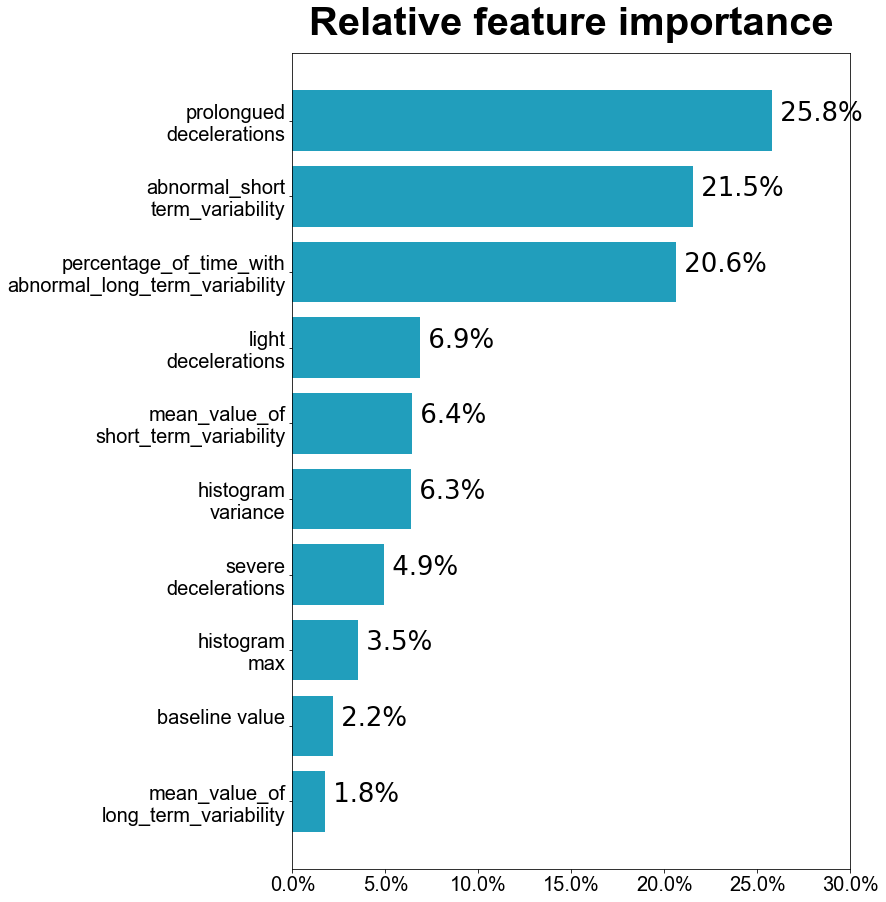

In [21]:
pd.DataFrame(selected_features).to_excel(f"{output_feature_selection}/selected_features.xlsx",index = False)
plot_feature_importance(df_lasso_combined,output_feature_selection,threshold = 0.2)

# 3.0 Modelling - Random forest and LASSO regression

### Since Random Forest and LASSO can be utilized in sklearn library, I just put them as one block.

In [22]:
def init_training_parameters():
    """
    The function is to initialize training parameters
    return: 1. a dict containing parameter for hyperparameter tuning
            2. metric for hyperparameter tuning
    """

    # This is a simplified version for demonstration purposes: I only hypertuned one hyperparameters for each algorithm
    measure_to_tune = 'roc_auc_ovr'  # for multiclass classification

    hyperparameter_dict = {

        "lasso":{},

        "Random forests": {'max_depth': [1, 2, 3, 4]},

        "Naive Bayes": {'var_smoothing': np.logspace(0, -9, num=100)},

        "XGBoost": {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]},

        "CART": {'ccp_alpha': [0.1, .01, .001]},

        "KNN": {'n_neighbors': (1, 10, 1)},

        "LDA": {'solver': ['svd', 'lsqr', 'eigen']},

        "SVM": {'C': [0.1, 1, 10, 100, 1000]},

        "Extra trees": {'n_estimators': [int(x) for x in np.linspace(start=50, stop=1000, num=10)]},

        "AdaBoost": {'n_estimators': [100, 200, 300]},

        "Neural network": {'hidden_layer_sizes': [(100, 100, 50), (50, 100, 50), (100, 50, 100)]}
    }

    return hyperparameter_dict,measure_to_tune

def prepare_model_pipeline(X_train,X_test,y_train,y_test,model_name,hyperparameter_dict,measure_to_tune,specific_seed):
    """
    The function is to prepare a pipeline of grid search, model training and model internal validation
    :param X_train, X_test, y_train, y_test: preprocessed data of radiomic features and Y label from training and test data
    :param model_name: name of the algorithm
    :param hyperparameter_dict: hyperparmeter dict for grid search tuning
    :param measure_to_tune: metric for hyperparameter tuning
    :param specific_seed: random seed for reproducibility
    return: 1. prediction from model
            2. probability of each class in numpy array
            3. trained model
            4. tuned hyperparemeter
    """
    try:
        parameters = hyperparameter_dict[f'{model_name}']
    except:
        print(f"\nNo parameters for Grid search!\n")
        parameters={}

    n_class = len(np.unique(y_test))
    #multiclass classification
    if model_name== 'lasso':
        pipeline = LogisticRegression(random_state=specific_seed)
    elif model_name == 'Random forests':
        pipeline = RandomForestClassifier(random_state=specific_seed)
    elif model_name == 'Naive Bayes':
        pipeline = GaussianNB()  #ok
    elif model_name == 'XGBoost':
        pipeline = XGBClassifier()
    elif model_name== 'CART':
        pipeline = DecisionTreeClassifier(random_state=specific_seed)
    elif model_name== 'KNN':
        pipeline = KNeighborsClassifier()
    elif model_name== 'LDA':
        pipeline = LinearDiscriminantAnalysis()
    elif model_name== 'SVM':
        pipeline = SVC(probability=True)
    elif model_name== 'Extra trees':
        pipeline = ExtraTreesClassifier(random_state=specific_seed)
    elif model_name== 'AdaBoost':
        pipeline = AdaBoostClassifier(random_state=specific_seed)
    elif model_name== 'Neural network':
        pipeline = MLPClassifier(max_iter = 2000, random_state = 42)
    else:
        print("Wrong selection for the model name!")
        pass

    grid_pipeline = GridSearchCV(pipeline,parameters,scoring=measure_to_tune,cv=5,n_jobs = -1)
    # fit
    model=grid_pipeline.fit(X_train,y_train)
    model = model.best_estimator_
    y_pred=model.predict(X_test)
    y_prob=model.predict_proba(X_test)
    model_para=grid_pipeline.best_params_
    return y_pred,y_prob,model,model_para

def run_model_pipeline(hyperparameter_dict,df_train,df_test,y_name,selected_features,measure_to_tune,mapping_dict
                            ,output_dir_model,output_dir_result,output_dir_log
                            ,seed = 42):
    """
    The function is to run the predifined pipeline of grid search, model training and model internal validation
    :param hyperparameter_dict: hyperparmeter dict for grid search tuning
    :param df_train, df_test: preprocessed training and test data
    :param selected_features: selected features for model training
    :param measure_to_tune: metric for hyperparameter tuning
    :param output_dir_model: folder path to save trained model
    :param output_dir_result: folder path to save results
    :param output_dir_log: folder path to save log files
    :param seed: random seed for reproducibility
    """

    best_params_dict = {}
    counter = 0


    for model_i in [x for x in list(hyperparameter_dict.keys())]:
        print(f'---->Algorithms: {model_i}')

        X_train = df_train[selected_features]
        X_test = df_test[selected_features]
        y_train = df_train[y_name]
        y_test = df_test[y_name]

        y_pred, y_prob, model, model_para = prepare_model_pipeline(X_train, X_test, y_train, y_test, model_i,hyperparameter_dict,
                                                             measure_to_tune=measure_to_tune, specific_seed=seed)

        y_test_str, y_pred_str = prepare_data_for_confusion_matrix(y_test, y_pred, mapping_dict)
        plot_confusion_matrix(y_test_str, y_pred_str, y_name, output_dir_result,model_i)
        # data preprocessing within model_Customized deactiavted by pass empty list
        best_params_dict[model_i] = []
        best_params_dict[model_i].append(model_para)

        with open(f'{output_dir_model}/{model_i}.sav', 'wb') as f:
            joblib.dump(model, f)

        test_ID_col = y_name
        test_ID = pd.DataFrame(df_test[test_ID_col])

        decimal_point = 2

        if counter == 0:
            result_dict, prob_df = evaluate_performance_multi(model_i, test_ID, test_ID_col, y_test, y_pred, y_prob,
                                                            None, None, counter, decimal_point)
        else:
            result_dict, prob_df = evaluate_performance_multi(model_i, test_ID, test_ID_col, y_test, y_pred, y_prob,
                                                            result_dict, prob_df, counter, decimal_point)
        counter += 1

    output = pd.DataFrame.from_dict(result_dict)
    output.to_excel(f"{output_dir_result}/output.xlsx", index=False)
    prob_df.to_excel(f"{output_dir_result}/output_prob.xlsx", index=False)
    pd.DataFrame.from_dict(best_params_dict).to_excel(f"{output_dir_log}/tuned_para.xlsx", index=False)

    # get boostrapping
    prob_address = f"{output_dir_result}/output_prob.xlsx"

    # Bootstrap for 100 times for demonstration purpose. Normally, I adopted 2000 for actual calculation
    prob_df = pd.read_excel(prob_address)
    output_df, df_list, corresponse_dict_name = bootstrap_CI_multi(prob_df, 100, decimal_point)
    output_df.to_excel(f'{output_dir_result}/Summarized_CI.xlsx')

    for df, name in zip(df_list, corresponse_dict_name):
        df.to_excel(f'{output_dir_result}/{name}.xlsx')


In [23]:
def prepare_data_for_confusion_matrix(y_test, y_pred, mapping_dict):
    """
    The function is to convert y_test and y_pred coded in numbers into strings
    :param y_test: ground truth of Y label
    :param y_pred: predicted class
    return y_test and y_pred in strings
    """
    y_test = y_test.tolist()
    y_pred = y_pred.tolist()

    y_test_str = np.array([mapping_dict.get(int(item), "aa") for item in y_test])
    y_pred_str = np.array([mapping_dict.get(int(item), "aa") for item in y_pred])
    return y_test_str,y_pred_str

def plot_confusion_matrix(y_test, y_pred, class_name, output_dir,model_name):
    """
    The function is to plot confusion matrix for prediction perfromance evaluation
    :param y_test: ground truth of Y label
    :param y_pred: predicted class
    :param output_dir: folder path to save images
    :param model_name: name for the model
    """
    # Generate the confusion matrixs
    labels = np.unique(y_test)

    cm = confusion_matrix(y_test, y_pred,labels = labels)
    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(model_name)
    plt.savefig(f"{output_dir}/{model_name}.jpg",bbox_inches= "tight")


# compilation of all evaluation measures
def evaluate_performance_multi(model_i, test_ID, test_ID_col, y_test, y_pred, y_prob, result_dict, prob_df, counter,
                             decimal_point):
    """
    The function is to summarize evaluation metric for multiclass classification
    :param model_i: name of the model
    :param test_ID: dataframe storing Case ID
    :param test_ID_col: column name of Case ID
    :param y_test, y_pred, y_prob: ground truth, predicted class and probability for each class
    :param result_dict: result dict from previous for loop cycle, it can be None at the initialization
    :param prob_df: dataframe of probability from previous for loop cycle, it can be empty at the initialization
    :param counter: counter for documenting for loop
    :param decimal_point: decimal point for numeric rounding
    return 1. a dict that stores predictions
            2. dataframe to stores probability
    """
    if counter == 0:
        result_dict = {}
        result_dict["classification"] = []
        result_dict['Matthew_CC'] = []
        result_dict['Cohen_kappa'] = []
        result_dict['log_loss'] = []
        result_dict["auc_ovr_weighted"] = []
        result_dict["f1_weighted"] = []
        result_dict['Precision'] = []
        result_dict['Recall'] = []
        prob_df = pd.DataFrame()

    MCC = matthews_corrcoef(y_test, y_pred)
    cohen = cohen_kappa_score(y_test, y_pred)
    log_loss_value = log_loss(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob, average="weighted", multi_class="ovr")
    cr = classification_report(y_test, y_pred, output_dict=True)
    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1_weighted = cr['weighted avg']['f1-score']
    confustion_mat = confusion_matrix(y_test, y_pred)

    print(" Matthew: ", format_float_value(MCC, decimal_point))
    print(" Cohen: ", format_float_value(cohen, decimal_point))
    print(" Log loss: ", format_float_value(log_loss_value, decimal_point))
    print(" AUC: ", format_float_value(auc, decimal_point))
    print(' F1: ', format_float_value(f1_weighted, decimal_point))
    print(" Precision: ", format_float_value(precision, decimal_point))
    print(" Recall: ", format_float_value(recall, decimal_point))
    print(' Confusion matrix: \n', confustion_mat)

    result_dict["classification"].append(model_i)
    result_dict['Matthew_CC'].append(MCC)
    result_dict['Cohen_kappa'].append(cohen)
    result_dict['log_loss'].append(log_loss_value)
    result_dict["auc_ovr_weighted"].append(auc)
    result_dict["f1_weighted"].append(f1_weighted)
    result_dict['Precision'].append(precision)
    result_dict['Recall'].append(recall)

    test_ID = test_ID.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    prob_df[f'$Case'] = np.array(list(test_ID[test_ID_col]))

    for i in [int(x) for x in np.unique(y_test)]:
        prob_df[f'{model_i}_{i}'] = y_prob[:, i]
    prob_df[f'{model_i}@Gt'] = y_test
    prob_df[f'{model_i}@Pred'] = y_pred

    return result_dict, prob_df

# Calculation of 95% by bootstrapping method
def bootstrap_CI_multi(prob_df, n_bootstrap, decimal_point):
    """
    The function is to calculate the 95% confidence interval by boostraping
    :param prob_df: dataframe for storage of probability of each class
    :param n_bootstrap: number of bootstraping cycle
    :param decimal_point: decimal point for numeric rounding
    return 1.output_df: a summary of model performance for each algorithm and each evaluation metric
           2.df_list: a list of dataframe of  for each evaluation metric
           3.corresponse_dict_name: a list of evaluation metric names
    """

    bootstrap_count = 0
    Matthew_dict = {}
    Cohen_kappa_dict = {}
    log_loss_dict = {}
    auc_dict = {}
    f1_weighted_dict = {}
    prec_dict = {}
    recal_dict = {}

    col_name = prob_df.columns.to_list()
    model_name_pre = [x for x in col_name if "$" not in x and "@" not in x]
    model_name = np.unique([x.split("_")[0] for x in model_name_pre])
    categories = np.unique([x.split("_")[1] for x in model_name_pre])

    dict_list = [Matthew_dict, Cohen_kappa_dict, log_loss_dict, auc_dict, f1_weighted_dict, prec_dict, recal_dict]
    corresponse_dict_name = ["MCC", "Cohen", "log_loss", "auc", "f1", "Precision", "Recall"]

    for metric_dict in dict_list:
        for model in model_name:
            metric_dict[model] = []

    for i in range(n_bootstrap):
        # i_bootstrap=np.random.sample(prob_df,size=len(prob_df))
        i_bootstrap = prob_df.sample(n=int(len(prob_df) * 0.8), random_state=i).reset_index()

        for model in model_name:
            if len(np.unique(i_bootstrap[f"{model}@Gt"])) == len(categories):  # make sure all classes were present
                model_prob = i_bootstrap[[f'{model}_{x}' for x in categories]]
                model_pred = i_bootstrap[f"{model}@Pred"]
                model_Gt = i_bootstrap[f"{model}@Gt"]

                MCC = matthews_corrcoef(model_Gt, model_pred)
                cohen = cohen_kappa_score(model_Gt, model_pred)
                log_loss_value = log_loss(model_Gt, model_prob)
                auc = roc_auc_score(model_Gt, model_prob, average="weighted", multi_class="ovr")
                cr = classification_report(model_Gt, model_pred, output_dict=True)
                precision = cr['weighted avg']['precision']
                recall = cr['weighted avg']['recall']
                f1_weighted = cr['weighted avg']['f1-score']

                Matthew_dict[model].append(MCC)
                Cohen_kappa_dict[model].append(cohen)
                log_loss_dict[model].append(log_loss_value)
                auc_dict[model].append(auc)
                f1_weighted_dict[model].append(f1_weighted)
                prec_dict[model].append(precision)
                recal_dict[model].append(recall)

        bootstrap_count += 1

    point_sum = {}
    for name, metric_dict in zip(corresponse_dict_name, dict_list):
        point_sum[name] = {}
        for model in model_name:

            try:
                point_sum[name][f'{model}'] = calculate_CI(metric_dict[model], decimal_point)
            except:
                point_sum[name][f'{model}'] = "NaN"

    output_df = pd.DataFrame.from_dict(point_sum)
    print(f'{bootstrap_count} Boostrapping successed!')
    df_list = [pd.DataFrame.from_dict(x) for x in dict_list]

    return output_df, df_list, corresponse_dict_name

def format_float_value(input, decimal_point):
    """
    The function is to format float value
    :param input: float value
    :param decimal_point: decimal point for numeric rounding
    return formatted float value
    """
    format_string = "{:." + str(decimal_point) + "f}"
    return format_string.format(round(input, decimal_point))


def calculate_CI(raw_value, decimal_point):
    """
    The function is to calculate confidence interval and formulate output
    :param raw_value: a list of numbers
    :param decimal_point: decimal point for numeric rounding
    return formulated output
    """

    average = np.average(raw_value)
    average_1 = round(average, decimal_point)
    raw_value.sort()
    confidence_lower = raw_value[int(0.025 * len(raw_value))]
    confidence_upper = raw_value[int(0.975 * len(raw_value))]

    confidence_lower_1 = round(confidence_lower, decimal_point)
    confidence_upper_1 = round(confidence_upper, decimal_point)
    point_output = '{} ({} - {})'.format(format_float_value(average_1, decimal_point),
                                         format_float_value(confidence_lower_1, decimal_point),
                                         format_float_value(confidence_upper_1, decimal_point))
    return point_output


In [24]:
measure_to_tune = 'roc_auc_ovr'
y_rename_dict_reverse = {0: "Normal", 
                         1: "Suspect", 
                         2: "Pathological"}
cols_after_lasso = selected_features

if y_name not in cols_after_lasso:
    cols_after_lasso.append(y_name)
    
df_train = df_train[cols_after_lasso]

df_test = pd.concat([X_test,y_test],axis= 1)
df_test = df_test[cols_after_lasso]

---->Algorithms: lasso
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.01
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[329   0   0]
 [  0 344   1]
 [  0   0 319]]
---->Algorithms: Random forests
 Matthew:  0.98
 Cohen:  0.98
 Log loss:  0.18
 AUC:  1.00
 F1:  0.99
 Precision:  0.99
 Recall:  0.99
 Confusion matrix: 
 [[324   5   0]
 [  2 340   3]
 [  0   0 319]]
---->Algorithms: Naive Bayes
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.04
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[328   0   1]
 [  0 345   0]
 [  0   0 319]]
---->Algorithms: XGBoost
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.00
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[329   0   0]
 [  0 345   0]
 [  0   0 319]]
---->Algorithms: CART
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.00
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[329   0   0]
 [  0 345   0]
 [  0   0 319]]
---->Algorithms: KN

/Users/u0126415/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/u0126415/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/u0126415/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/Users/u0126415/miniforge3/envs/tf26/lib/python3.9/site-packages/sklearn/discriminant_analysis.py", line 463, in

 Matthew:  0.80
 Cohen:  0.79
 Log loss:  0.41
 AUC:  0.95
 F1:  0.86
 Precision:  0.87
 Recall:  0.86
 Confusion matrix: 
 [[276  41  12]
 [ 10 318  17]
 [  3  53 263]]
---->Algorithms: SVM
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.01
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[328   0   1]
 [  1 343   1]
 [  0   0 319]]
---->Algorithms: Extra trees
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.01
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[329   0   0]
 [  0 344   1]
 [  0   0 319]]
---->Algorithms: AdaBoost
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.00
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[329   0   0]
 [  0 345   0]
 [  0   0 319]]
---->Algorithms: Neural network
 Matthew:  1.00
 Cohen:  1.00
 Log loss:  0.02
 AUC:  1.00
 F1:  1.00
 Precision:  1.00
 Recall:  1.00
 Confusion matrix: 
 [[328   0   1]
 [  0 344   1]
 [  0   0 319]]
100 Boostrapping successed!


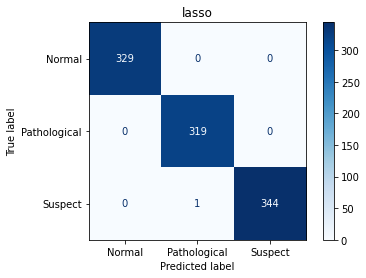

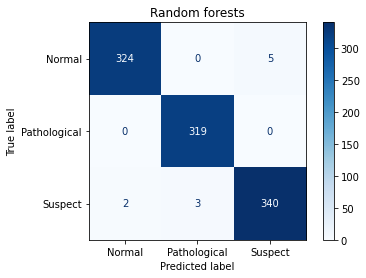

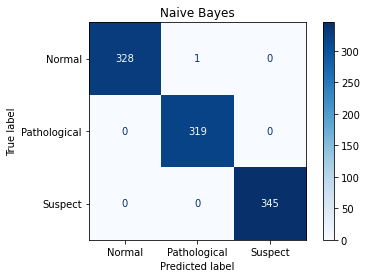

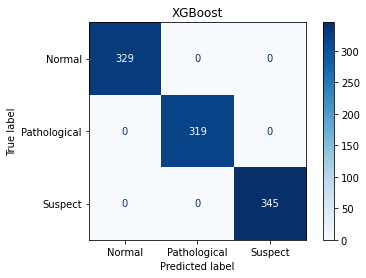

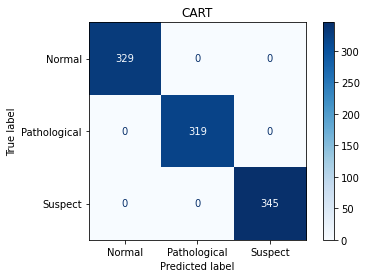

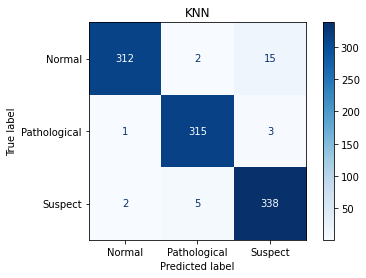

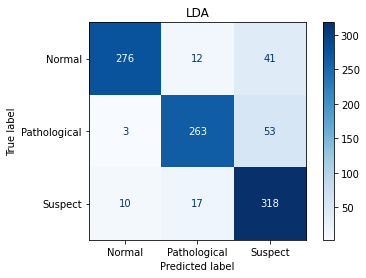

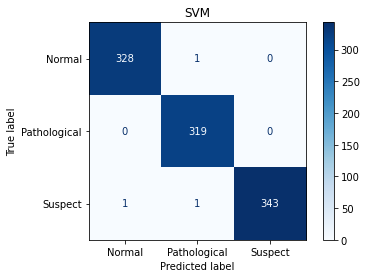

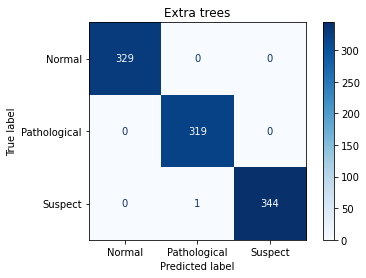

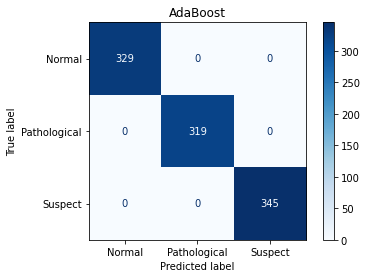

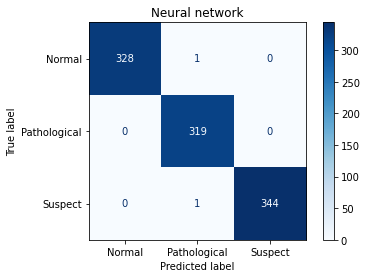

In [25]:
hyperparameter_dict,measure_to_tune = init_training_parameters()
run_model_pipeline(hyperparameter_dict,df_train,df_test,y_name,selected_features,measure_to_tune,y_rename_dict_reverse,
                   output_models,output_computation,output_log,seed = 42)

# 4.0 Modelling - CNN

In [26]:
import numpy as np
import tensorflow as tf  #to solve the importing issue, I setup a vitrual environment in advance
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [27]:
#Disable GPU on my macbook
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
tf.config.set_visible_devices([], 'GPU')

In [28]:
#data preparation
#Here the X_train contains features that are only selected by unsupervised feature selection, 
#because the supervised feature selection can be achieved within the CNN training
X_train_cnn = np.array(X_train)
X_test_cnn = np.array(X_test)
X_train_cnn = X_train_cnn.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test_cnn.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train_cnn = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cnn = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [29]:
#model training
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_cnn, y_train_cnn, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test_cnn))

Epoch 1/20


2024-06-06 12:29:11.520397: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


105/125 [========================>.....] - ETA: 0s - loss: 0.6485 - accuracy: 0.7414 

2024-06-06 12:29:11.880325: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x33661b1d0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-06-06 12:29:11.880338: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2024-06-06 12:29:11.885992: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-06 12:29:11.915673: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


125/125 [==============================] - 1s 2ms/step - loss: 0.6208 - accuracy: 0.7558 - val_loss: 0.3970 - val_accuracy: 0.8691
Epoch 2/20
125/125 [==============================] - 0s 629us/step - loss: 0.3772 - accuracy: 0.8613 - val_loss: 0.3375 - val_accuracy: 0.8731
Epoch 3/20
125/125 [==============================] - 0s 606us/step - loss: 0.3229 - accuracy: 0.8754 - val_loss: 0.3018 - val_accuracy: 0.8983
Epoch 4/20
125/125 [==============================] - 0s 616us/step - loss: 0.2970 - accuracy: 0.8837 - val_loss: 0.2784 - val_accuracy: 0.9104
Epoch 5/20
125/125 [==============================] - 0s 635us/step - loss: 0.2715 - accuracy: 0.8990 - val_loss: 0.2615 - val_accuracy: 0.9215
Epoch 6/20
125/125 [==============================] - 0s 656us/step - loss: 0.2491 - accuracy: 0.9053 - val_loss: 0.2488 - val_accuracy: 0.9235
Epoch 7/20
125/125 [==============================] - 0s 613us/step - loss: 0.2403 - accuracy: 0.9121 - val_loss: 0.2387 - val_accuracy: 0.9235
Epoch

In [30]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test_cnn)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

32/32 [==============================] - 0s 371us/step - loss: 0.2082 - accuracy: 0.9476
Test Accuracy: 94.76%
